<a href="https://colab.research.google.com/github/Dharsh100604/Bitcoin_Price_Prediction/blob/main/Prophet%2BLSTM%2BGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from prophet import Prophet
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/daily_data.csv')
df.head()

,datetime,mempool_size,transaction_rate,market_cap_usd,average_block_size,market_price_usd,exchange_volume_usd,average_confirmation_time,hash_rate,difficulty,miners_revenue,total_transaction_fees
0,2009-01-03,2.316133e+07,3.189727,1.778432e+11,0.643608,9564.799633,2.127196e+08,94.005174,4.971027e-08,1.000000e+00,1.138472e+07,56.94819
1,2009-01-04,2.316133e+07,3.189727,1.778432e+11,0.643608,9564.799633,2.127196e+08,94.005174,5.635911e+07,7.769155e+12,1.138472e+07,56.94819
2,2009-01-05,2.316133e+07,3.189727,1.778432e+11,0.643608,9564.799633,2.127196e+08,94.005174,5.635911e+07,7.769155e+12,1.138472e+07,56.94819
3,2009-01-06,2.316133e+07,3.189727,1.778432e+11,0.643608,9564.799633,2.127196e+08,94.005174,5.635911e+07,7.769155e+12,1.138472e+07,56.94819
4,2009-01-07,2.316133e+07,3.189727,1.778432e+11,0.643608,9564.799633,2.127196e+08,94.005174,5.635911e+07,7.769155e+12,1.138472e+07,56.94819


In [ ]:
# prompt: the above dataset consists of datetime display staring and ending of it.which period will be suited for market_price_usd prediction

import pandas as pd

# Assuming your DataFrame is named 'df' and has a 'datetime' column
df['datetime'] = pd.to_datetime(df['datetime'])

# Find the starting and ending dates
start_date = df['datetime'].min()
end_date = df['datetime'].max()

print(f"Dataset starts on: {start_date}")
print(f"Dataset ends on: {end_date}")


# Determine the appropriate period for prediction
# Consider factors like:
# 1. Data availability: Is there enough data for a particular period?
# 2. Market stability: Is the market relatively stable during the period?
# 3. Predictability: Does the market price show predictable patterns during the period?
# 4. Model performance: How well does your model perform on different periods?


# Example: You can analyze different periods to compare model performance.
# For example, you can create multiple datasets with various time ranges.

# Define a range (e.g., 2 years) for your prediction
prediction_period_length = pd.DateOffset(years=2)
training_end_date = end_date - prediction_period_length

# Split the dataset into training and testing sets
training_data = df[df['datetime'] <= training_end_date]
testing_data = df[df['datetime'] > training_end_date]

# Train and evaluate your model (e.g., Prophet, LSTM) on the training data
# and test on the testing data.
# Check the performance metrics (e.g., RMSE, MAE) to determine which period
# yields the best predictions.

# You may consider plotting the price data for different periods to
# visually identify any patterns or trends.

# Ultimately, you should choose the period that gives you the best
# prediction accuracy and fits your specific requirements.



Dataset starts on: 2009-01-03 00:00:00
Dataset ends on: 2023-09-02 00:00:00


In [ ]:
df.isnull().sum()

,0
datetime,0
mempool_size,0
transaction_rate,0
market_cap_usd,0
average_block_size,0
market_price_usd,0
exchange_volume_usd,0
average_confirmation_time,0
hash_rate,0
difficulty,0


In [ ]:
testing_data['datetime'].min()

Timestamp('2021-09-03 00:00:00')

In [ ]:
df.shape

(5356, 12)

In [ ]:
# # Prophet model
# df['ds'] = pd.to_datetime(df['datetime'])  # Prophet requires the column 'ds' for dates
# df['y'] = df['market_price_usd']      # Prophet requires the column 'y' for the target

# model_prophet = Prophet()
# model_prophet.fit(df)

# # Predict using Prophet
# future = model_prophet.make_future_dataframe(periods=30)  # Forecast 30 days ahead
# forecast = model_prophet.predict(future)
# prophet_predictions = forecast['yhat']

# # Calculate residuals
# residuals = df['market_price_usd'] - forecast['yhat']

# # Train an LSTM on the residuals
# scaler = MinMaxScaler()
# residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# X_train, y_train = create_lstm_dataset(residuals_scaled)  # Create LSTM-friendly input

# model_lstm = Sequential()
# model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model_lstm.add(LSTM(50))
# model_lstm.add(Dense(1))
# model_lstm.compile(optimizer='adam', loss='mse')
# model_lstm.fit(X_train, y_train, epochs=20, batch_size=64)

# # LSTM predictions
# lstm_predictions = model_lstm.predict(X_train)

# # Combine Prophet and LSTM predictions
# final_predictions = prophet_predictions + lstm_predictions


In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the create_lstm_dataset function
def create_lstm_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

df = pd.read_csv('/content/drive/MyDrive/Dataset/daily_data.csv')
df['ds'] = pd.to_datetime(df['datetime'])  # Prophet requires the column 'ds' for dates
df['y'] = df['market_price_usd']      # Prophet requires the column 'y' for the target

model_prophet = Prophet()
model_prophet.fit(df)

# Predict using Prophet
future = model_prophet.make_future_dataframe(periods=30)  # Forecast 30 days ahead
forecast = model_prophet.predict(future)

#Obtain prophet predictions for the dates that are present in the original dataframe
prophet_predictions = forecast['yhat'][0:len(df)]

# Calculate residuals
residuals = df['market_price_usd'] - prophet_predictions

# Train an LSTM on the residuals
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Create LSTM-friendly input using the defined function
X_train, y_train = create_lstm_dataset(residuals_scaled)

model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=64)

# LSTM predictions
lstm_predictions = model_lstm.predict(X_train)

# Inverse transform the LSTM predictions to get them back to the original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Combine Prophet and LSTM predictions
final_predictions = prophet_predictions[:-2] + lstm_predictions.flatten()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/p9zq_o_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/xa1uw29e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34626', 'data', 'file=/tmp/tmp29vixq4x/p9zq_o_g.json', 'init=/tmp/tmp29vixq4x/xa1uw29e.json', 'output', 'file=/tmp/tmp29vixq4x/prophet_modelmp6rdvho/prophet_model-20241017102154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:22:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0838
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0051
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0022
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.8770e-04
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.6388e-04
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.2086e-04
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.8335e-04
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3112e-04
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2134e-04
Epoch 10/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1003e-04
Epoch 11/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7086e-04
Epoch 12/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5425e-04
Epoch 13/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3307e-04
Epoch 14/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2554e-04
Epoch 15/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/28jyhx83.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/k3vbzch0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76042', 'data', 'file=/tmp/tmp29vixq4x/28jyhx83.json', 'init=/tmp/tmp29vixq4x/k3vbzch0.json', 'output', 'file=/tmp/tmp29vixq4x/prophet_modelwk9b53dl/prophet_model-20241017102223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:22:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:22:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0311
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.9349e-04
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.3529e-04
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.4431e-04
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.6815e-04
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.0820e-04
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.3380e-04
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7607e-04
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.1984e-04
Epoch 10/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 4.7562e-04
Epoch 11/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.2549e-04
Epoch 12/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2072e-04
Epoch 13/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.0988e-04
Epoch 14/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.6556e-04
Epoch 15/20
84/84 ━━━━━━━━━━━━

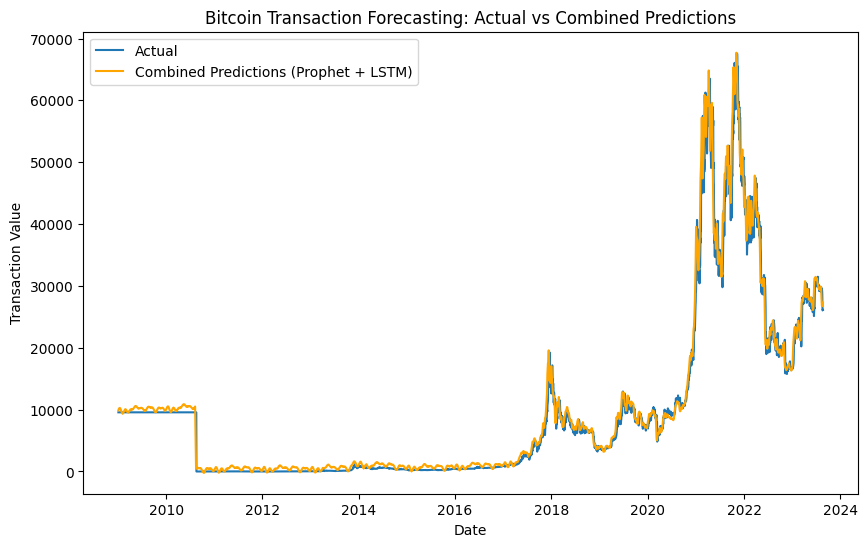

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Load your Bitcoin transaction data
df = pd.read_csv('/content/drive/MyDrive/Dataset/daily_data.csv')

# Preparing the data for Prophet
df['ds'] = pd.to_datetime(df['datetime'])  # Prophet requires 'ds' for dates
df['y'] = df['market_price_usd']      # Prophet requires 'y' for the target

# 2. Train Prophet model to capture the trend and seasonality
model_prophet = Prophet()
model_prophet.fit(df)

# Make future predictions with Prophet
future = model_prophet.make_future_dataframe(periods=30)  # Forecast 30 days ahead
forecast = model_prophet.predict(future)

# Extract the Prophet predictions and residuals
prophet_predictions = forecast['yhat']
residuals = df['y'] - prophet_predictions[:len(df)]  # Calculate residuals

# 3. Train LSTM on residuals
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Prepare LSTM inputs and outputs
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_lstm_dataset(residuals_scaled, time_step)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Create the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# Make LSTM predictions on the residuals
lstm_predictions = model_lstm.predict(X_train)

# Inverse scale the LSTM predictions
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)

# 4. Combine Prophet predictions and LSTM residual predictions
combined_predictions = prophet_predictions[:len(lstm_predictions_inverse)] + lstm_predictions_inverse[:, 0]

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(combined_predictions)], df['y'][:len(combined_predictions)], label='Actual')
plt.plot(df['ds'][:len(combined_predictions)], combined_predictions, label='Combined Predictions (Prophet + LSTM)', color='orange')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Actual vs Combined Predictions")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# 5. Calculate error metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(df['y'][:len(combined_predictions)], combined_predictions)

# Mean Squared Error (MSE)
mse = mean_squared_error(df['y'][:len(combined_predictions)], combined_predictions)

# R-squared Score (R2)
r2 = r2_score(df['y'][:len(combined_predictions)], combined_predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/6i_fgjci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/6gi7gb08.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51320', 'data', 'file=/tmp/tmp29vixq4x/6i_fgjci.json', 'init=/tmp/tmp29vixq4x/6gi7gb08.json', 'output', 'file=/tmp/tmp29vixq4x/prophet_modelrq_niv1w/prophet_model-20241017103322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:33:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0462
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0027
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.9498e-04
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011
Epoch 16/20

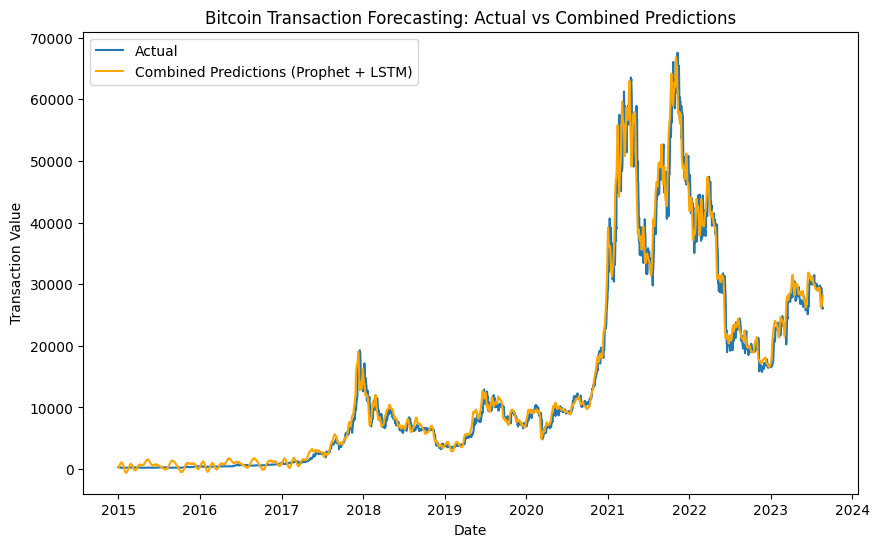

MAE: 1261.8842201245868
MSE: 4694266.942576584
R-squared: 0.9818367380337873


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Load your Bitcoin transaction data
df = pd.read_csv('/content/drive/MyDrive/Dataset/daily_data_new.csv')

# Preparing the data for Prophet
df['ds'] = pd.to_datetime(df['datetime'])
df['y'] = df['market_price_usd']

# 2. Train Prophet model to capture the trend and seasonality
model_prophet = Prophet()
model_prophet.fit(df)

# Make future predictions with Prophet
future = model_prophet.make_future_dataframe(periods=30)  # Forecast 30 days ahead
forecast = model_prophet.predict(future)

# Extract the Prophet predictions and residuals
prophet_predictions = forecast['yhat']
residuals = df['y'] - prophet_predictions[:len(df)]  # Calculate residuals

# 3. Train LSTM on residuals
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Prepare LSTM inputs and outputs
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_lstm_dataset(residuals_scaled, time_step)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Create the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# Make LSTM predictions on the residuals
lstm_predictions = model_lstm.predict(X_train)

# Inverse scale the LSTM predictions
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)

# 4. Combine Prophet predictions and LSTM residual predictions
combined_predictions = prophet_predictions[:len(lstm_predictions_inverse)] + lstm_predictions_inverse[:, 0]

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(combined_predictions)], df['y'][:len(combined_predictions)], label='Actual')
plt.plot(df['ds'][:len(combined_predictions)], combined_predictions, label='Combined Predictions (Prophet + LSTM)', color='orange')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Actual vs Combined Predictions")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# 5. Calculate error metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(df['y'][:len(combined_predictions)], combined_predictions)

# Mean Squared Error (MSE)
mse = mean_squared_error(df['y'][:len(combined_predictions)], combined_predictions)

# R-squared Score (R2)
r2 = r2_score(df['y'][:len(combined_predictions)], combined_predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# Load your Bitcoin transaction data
df = pd.read_csv('/content/drive/MyDrive/Dataset/daily_data_new.csv')

# Prepare data for Prophet
df['ds'] = pd.to_datetime(df['datetime'])
df['y'] = df['market_price_usd']

# # # 1. Prophet Model
model_prophet = Prophet()
model_prophet.fit(df)
future = model_prophet.make_future_dataframe(periods=30)
forecast_prophet = model_prophet.predict(future)
prophet_predictions = forecast_prophet['yhat']

# 2. Prophet + LSTM Model
residuals = df['y'] - prophet_predictions[:len(df)]  # Calculate residuals
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_lstm_dataset(residuals_scaled, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Create LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

lstm_predictions = model_lstm.predict(X_train)
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)

# Combine Prophet + LSTM
combined_predictions_lstm = prophet_predictions[:len(lstm_predictions_inverse)] + lstm_predictions_inverse[:, 0]

# 3. Prophet + LSTM + GRU Model
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(50))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

gru_predictions = model_gru.predict(X_train)
gru_predictions_inverse = scaler.inverse_transform(gru_predictions)

# Combine Prophet + LSTM + GRU
combined_predictions_lstm_gru = prophet_predictions[:len(lstm_predictions_inverse)] + lstm_predictions_inverse[:, 0] + gru_predictions_inverse[:, 0]


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/kxyvuaxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/spnvb6i5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69082', 'data', 'file=/tmp/tmp29vixq4x/kxyvuaxy.json', 'init=/tmp/tmp29vixq4x/spnvb6i5.json', 'output', 'file=/tmp/tmp29vixq4x/prophet_modelcwcqh3g7/prophet_model-20241017102329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:23:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:23:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0326
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0011
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0012
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.9353e-04
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 16/20

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0436
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0017
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0011
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.3806e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.0561e-04
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.4130e-04
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.3407e-04
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.7212e-04
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.3305e-04
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.2871e-04
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.6643e-04
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.2605e-04
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.0562e-04
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.2717e-04
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━

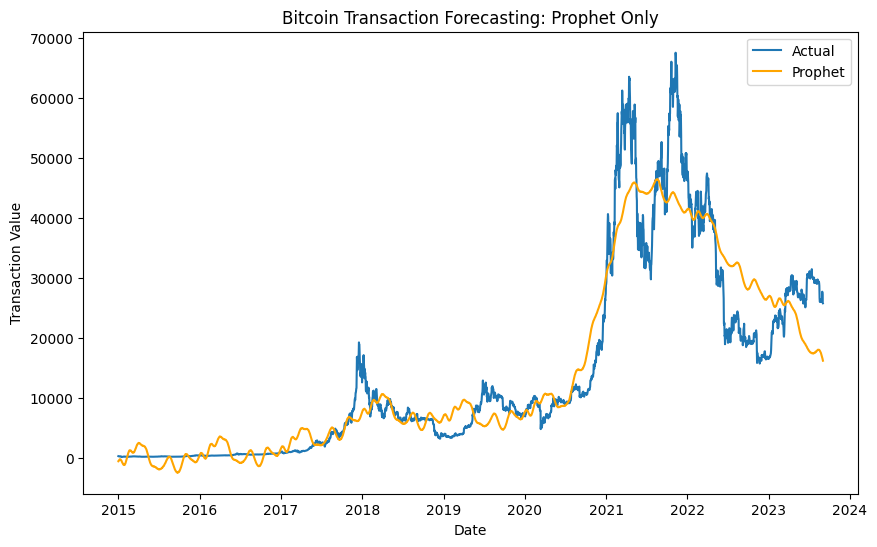

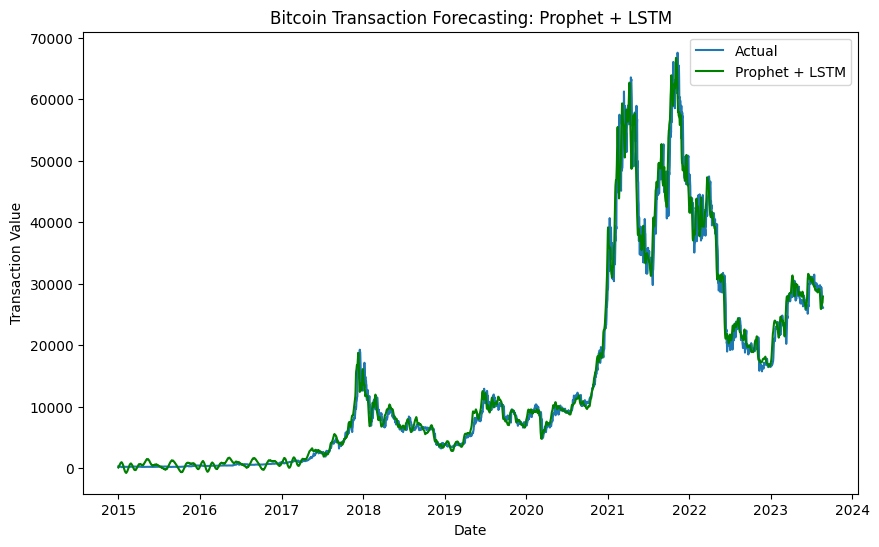

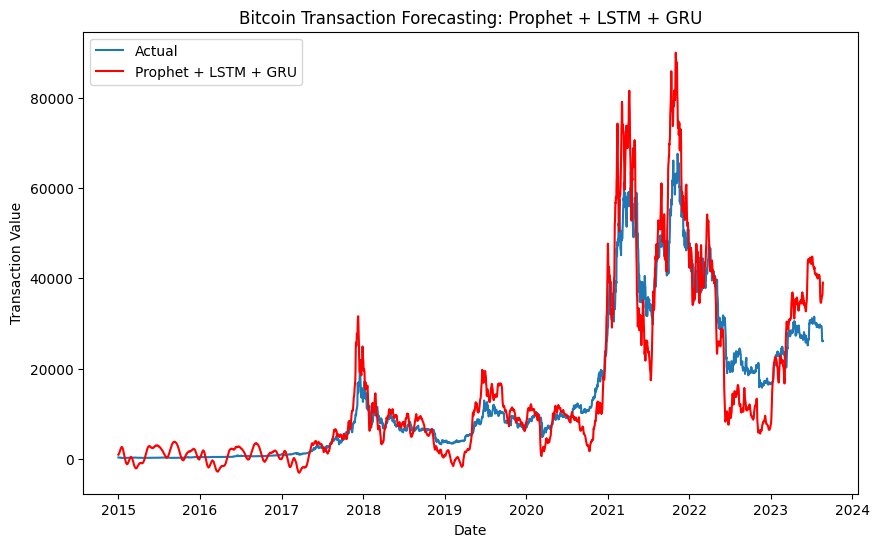

In [ ]:

# Plot Prophet-only predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(df)], df['y'][:len(df)], label='Actual') # Changed from prophet_predictions to df
plt.plot(df['ds'][:len(df)], prophet_predictions[:len(df)], label='Prophet', color='orange') # Changed from prophet_predictions to prophet_predictions[:len(df)]
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet Only")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# Plot Prophet + LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(combined_predictions_lstm)], df['y'][:len(combined_predictions_lstm)], label='Actual')
plt.plot(df['ds'][:len(combined_predictions_lstm)], combined_predictions_lstm, label='Prophet + LSTM', color='green')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet + LSTM")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# Plot Prophet + LSTM + GRU predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(combined_predictions_lstm_gru)], df['y'][:len(combined_predictions_lstm_gru)], label='Actual')
plt.plot(df['ds'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru, label='Prophet + LSTM + GRU', color='red')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet + LSTM + GRU")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()


In [ ]:
# Prophet-only errors
mae_prophet = mean_absolute_error(df['y'][:len(df)], prophet_predictions[:len(df)]) # Slice prophet_predictions to the length of df
mse_prophet = mean_squared_error(df['y'][:len(df)], prophet_predictions[:len(df)]) # Slice prophet_predictions to the length of df
r2_prophet = r2_score(df['y'][:len(df)], prophet_predictions[:len(df)]) # Slice prophet_predictions to the length of df

# Prophet + LSTM errors
mae_lstm = mean_absolute_error(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)
mse_lstm = mean_squared_error(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)
r2_lstm = r2_score(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)

# Prophet + LSTM + GRU errors
mae_lstm_gru = mean_absolute_error(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)
mse_lstm_gru = mean_squared_error(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)
r2_lstm_gru = r2_score(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)

print(f"Prophet-only: MAE = {mae_prophet}, MSE = {mse_prophet}, R-squared = {r2_prophet}")
print(f"Prophet + LSTM: MAE = {mae_lstm}, MSE = {mse_lstm}, R-squared = {r2_lstm}")
print(f"Prophet + LSTM + GRU: MAE = {mae_lstm_gru}, MSE = {mse_lstm_gru}, R-squared = {r2_lstm_gru}")

Prophet-only: MAE = 3752.7549869830486, MSE = 30643863.456273966, R-squared = 0.8812512026652617
Prophet + LSTM: MAE = 1267.2616948966083, MSE = 4790429.629514881, R-squared = 0.9814646611801271
Prophet + LSTM + GRU: MAE = 4180.6641619059355, MSE = 39250700.85228576, R-squared = 0.8481294799255269


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/zex2z9ti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/ajvklst2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99574', 'data', 'file=/tmp/tmp29vixq4x/zex2z9ti.json', 'init=/tmp/tmp29vixq4x/ajvklst2.json', 'output', 'file=/tmp/tmp29vixq4x/prophet_modelifbqmcu9/prophet_model-20241017102426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0521
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0011
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011
Epoch 16/20
50/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0332
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0014
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 9.4736e-04
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 7.7644e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.4526e-04
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 7.0702e-04
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 6.8868e-04
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 6.4549e-04
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6.3180e-04
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.2611e-04
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4648e-04
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.7377e-04
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.5656e-04
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.0723e-04
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━

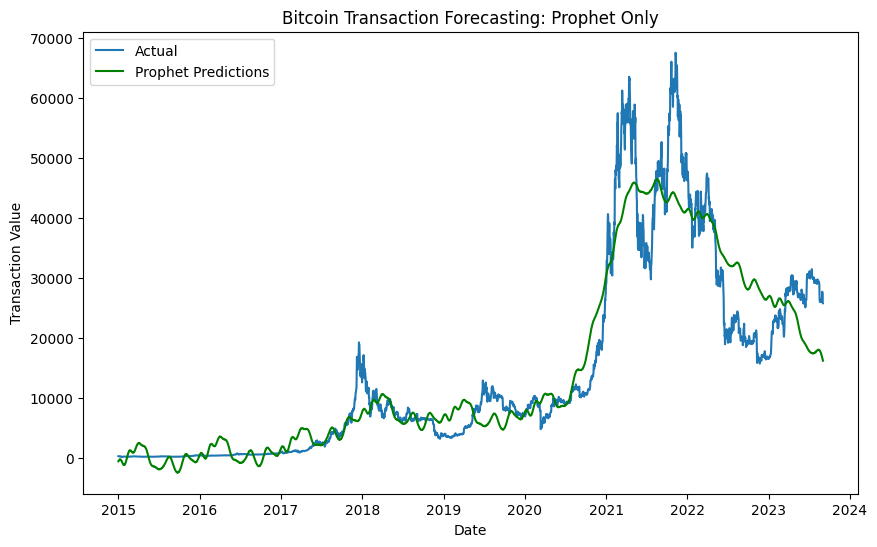

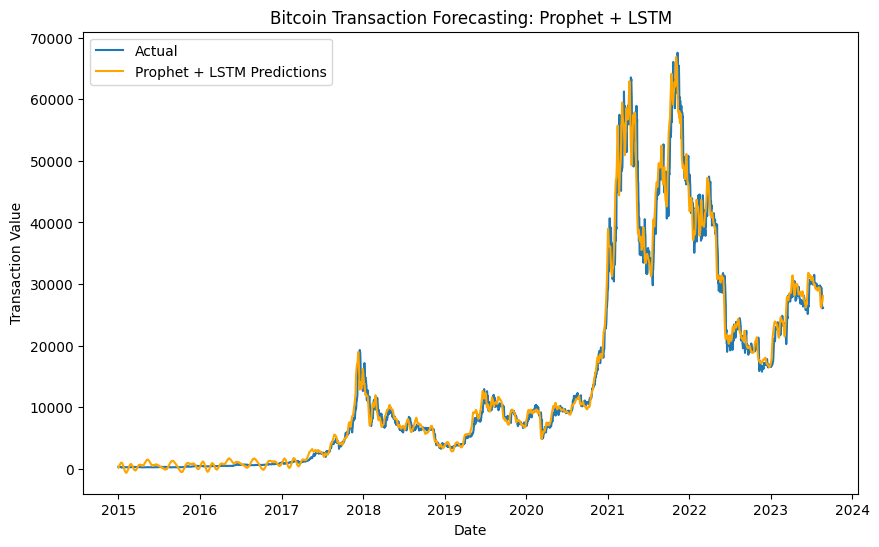

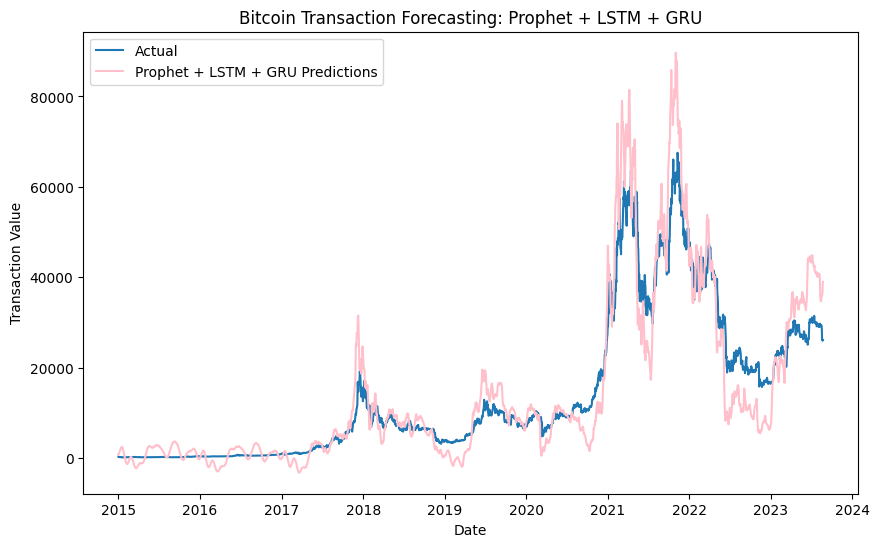

Prophet-only MAE: 3752.7549869830486, MSE: 30643863.456273966, R-squared: 0.8812512026652617
Prophet + LSTM MAE: 1228.8801720773681, MSE: 4533787.996576314, R-squared: 0.9824576701562935
Prophet + LSTM + GRU MAE: 4189.717317358223, MSE: 39390708.77786956, R-squared: 0.8475877551661912


In [ ]:
# Train Prophet model to capture the trend and seasonality
model_prophet = Prophet()
model_prophet.fit(df)

# Make future predictions with Prophet
future = model_prophet.make_future_dataframe(periods=30)  # Forecast 30 days ahead
forecast = model_prophet.predict(future)

# Extract the Prophet predictions and residuals
prophet_predictions = forecast['yhat']
residuals = df['y'] - prophet_predictions[:len(df)]  # Calculate residuals

# Function to prepare data for LSTM/GRU
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# 2. Train LSTM on residuals
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

time_step = 10
X_train, y_train = create_lstm_dataset(residuals_scaled, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Create LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# LSTM predictions on residuals
lstm_predictions = model_lstm.predict(X_train)
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)

# Combine Prophet and LSTM predictions
combined_predictions_lstm = prophet_predictions[:len(lstm_predictions_inverse)] + lstm_predictions_inverse[:, 0]

# 3. Train GRU on residuals
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(50))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')

# Train the GRU model
model_gru.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# GRU predictions on residuals
gru_predictions = model_gru.predict(X_train)
gru_predictions_inverse = scaler.inverse_transform(gru_predictions)

# Combine Prophet, LSTM, and GRU predictions
combined_predictions_lstm_gru = prophet_predictions[:len(gru_predictions_inverse)] + \
                                lstm_predictions_inverse[:, 0] + gru_predictions_inverse[:, 0]
# Plot Prophet-only predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(prophet_predictions)], df['y'][:len(prophet_predictions)], label='Actual')
plt.plot(df['ds'][:len(prophet_predictions)], prophet_predictions[:len(df)], label='Prophet Predictions', color='green')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet Only")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# Plot Prophet + LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(combined_predictions_lstm)], df['y'][:len(combined_predictions_lstm)], label='Actual')
plt.plot(df['ds'][:len(combined_predictions_lstm)], combined_predictions_lstm, label='Prophet + LSTM Predictions', color='orange')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet + LSTM")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# Plot Prophet + LSTM + GRU predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(combined_predictions_lstm_gru)], df['y'][:len(combined_predictions_lstm_gru)], label='Actual')
plt.plot(df['ds'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru, label='Prophet + LSTM + GRU Predictions', color='pink')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet + LSTM + GRU")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# 4. Calculate and display error metrics for each model

# Prophet-only metrics
mae_prophet = mean_absolute_error(df['y'][:len(prophet_predictions)], prophet_predictions[:len(df)])
mse_prophet = mean_squared_error(df['y'][:len(prophet_predictions)], prophet_predictions[:len(df)])
r2_prophet = r2_score(df['y'][:len(prophet_predictions)], prophet_predictions[:len(df)])

# Prophet + LSTM metrics
mae_lstm = mean_absolute_error(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)
mse_lstm = mean_squared_error(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)
r2_lstm = r2_score(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)

# Prophet + LSTM + GRU metrics
mae_lstm_gru = mean_absolute_error(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)
mse_lstm_gru = mean_squared_error(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)
r2_lstm_gru = r2_score(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)

print(f"Prophet-only MAE: {mae_prophet}, MSE: {mse_prophet}, R-squared: {r2_prophet}")
print(f"Prophet + LSTM MAE: {mae_lstm}, MSE: {mse_lstm}, R-squared: {r2_lstm}")
print(f"Prophet + LSTM + GRU MAE: {mae_lstm_gru}, MSE: {mse_lstm_gru}, R-squared: {r2_lstm_gru}")

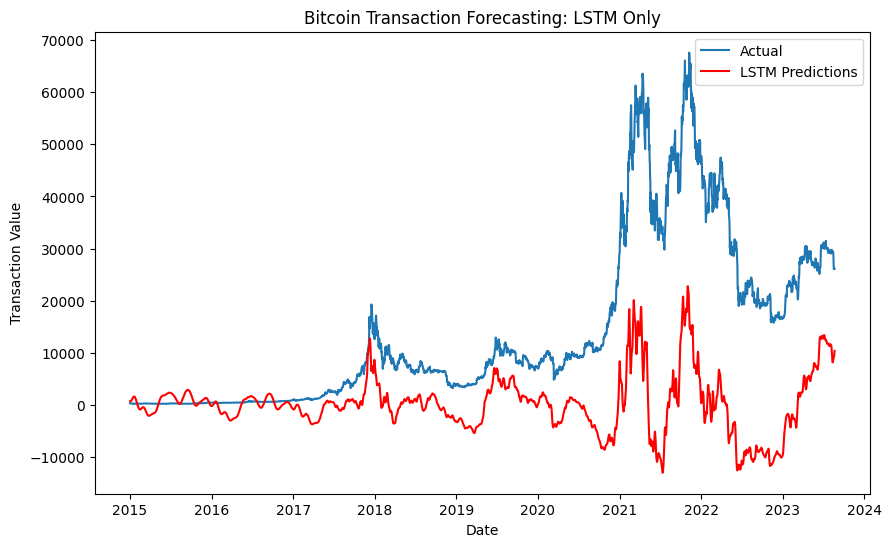

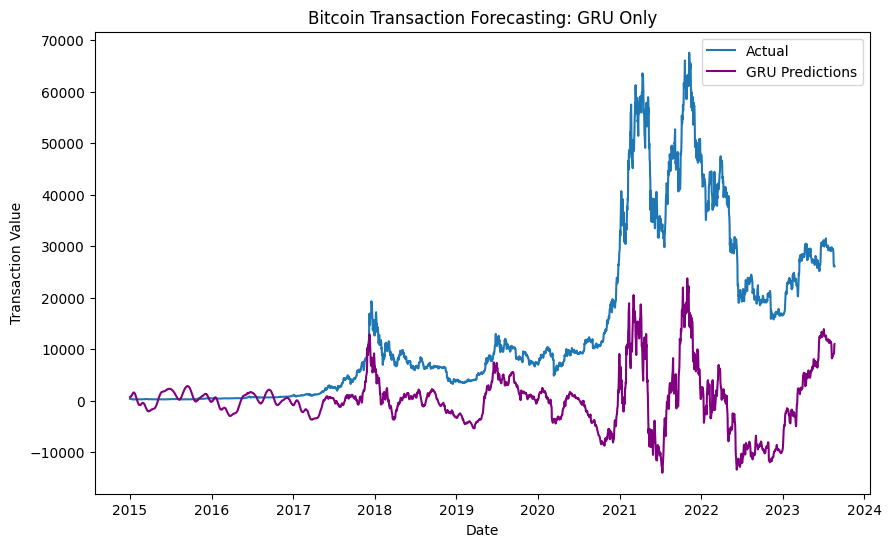

In [ ]:
import matplotlib.pyplot as plt

# Assuming lstm_predictions_inverse and gru_predictions_inverse are already computed and transformed back

# Plot for LSTM-only predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(lstm_predictions_inverse)], df['y'][:len(lstm_predictions_inverse)], label='Actual')
plt.plot(df['ds'][:len(lstm_predictions_inverse)], lstm_predictions_inverse, label='LSTM Predictions', color='red')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: LSTM Only")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# Plot for GRU-only predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(gru_predictions_inverse)], df['y'][:len(gru_predictions_inverse)], label='Actual')
plt.plot(df['ds'][:len(gru_predictions_inverse)], gru_predictions_inverse, label='GRU Predictions', color='purple')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: GRU Only")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()


In [ ]:
model_gru.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 10, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,905 (273.07 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 46,604 (182.05 KB)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 9.1015e-04 - val_loss: 0.0012
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.2906e-04 - val_loss: 0.0011
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.8188e-04 - val_loss: 0.0011
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.9306e-04 - val_loss: 0.0011
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.2468e-04 - val_loss: 0.0011
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.4105e-04 - val_loss: 0.0013
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.9218e-04 - val_loss: 0.0010
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.9300e-04 - val_loss: 0.0010
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.4810e-04 - val_loss: 0.0010
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.6755e-04 - val_loss: 0.0011
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.8342e-04 - val_loss: 9.5257e-04
Epoch 12/50
40/

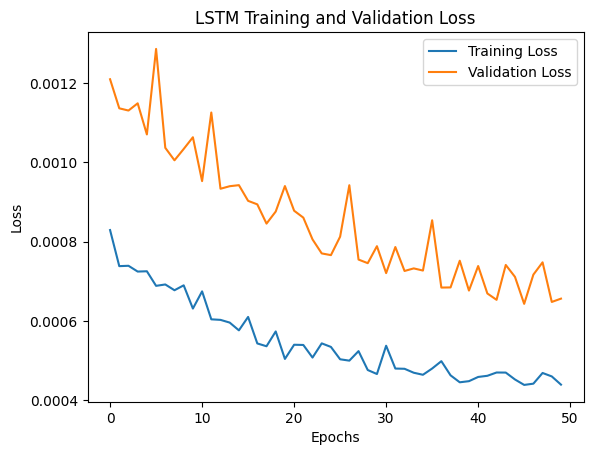

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the training history from your model_lstm.fit() method stored in a variable called 'history'
# You can access the training and validation loss using history.history['loss'] and history.history['val_loss']

# Train the LSTM model with a validation_split
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1, validation_split=0.2) # Added validation_split

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') # This will now work
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.9479e-04 - val_loss: 6.2148e-04
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.3161e-04 - val_loss: 6.1417e-04
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.5549e-04 - val_loss: 6.7882e-04
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.1059e-04 - val_loss: 6.0716e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.7674e-04 - val_loss: 5.8740e-04
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.2145e-04 - val_loss: 5.7978e-04
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.7561e-04 - val_loss: 5.9478e-04
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 3.8137e-04 - val_loss: 6.2361e-04
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.3309e-04 - val_loss: 5.8464e-04
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.6642e-04 - val_loss: 5.7384e-04
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.3818e-0

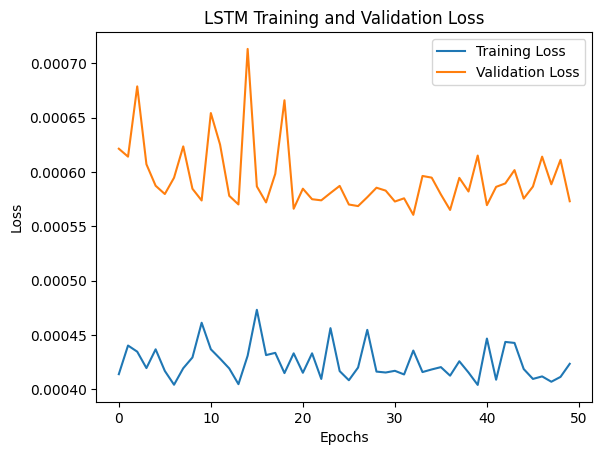

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the training history from your model_gru.fit() method stored in a variable called 'history'
# You can access the training and validation loss using history.history['loss'] and history.history['val_loss']

# Train the LSTM model with a validation_split
history = model_gru.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1, validation_split=0.2) # Added validation_split

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') # This will now work
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
!pip install prophet

In [ ]:
!pip install prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
# Prophet library is now called Prophet
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Hyperparameters
EPOCHS = 20
BATCH_SIZE = 64
TIME_STEP = 10

# Assuming df is your DataFrame with columns 'ds' and 'y'
# Train Prophet model to capture the trend and seasonality
model_prophet = Prophet()
model_prophet.fit(df)

# Make future predictions with Prophet
future = model_prophet.make_future_dataframe(periods=30)  # Forecast 30 days ahead
forecast = model_prophet.predict(future)

# Extract the Prophet predictions and residuals
prophet_predictions = forecast['yhat']
residuals = df['y'] - prophet_predictions[:len(df)]  # Calculate residuals

# Function to prepare data for LSTM/GRU
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare residuals for LSTM training
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

X_train, y_train = create_lstm_dataset(residuals_scaled, TIME_STEP)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Function to create and train LSTM model
def train_lstm(X_train, y_train):
    model_lstm = Sequential()
    model_lstm.add(LSTM(50, return_sequences=True, input_shape=(TIME_STEP, 1)))
    model_lstm.add(LSTM(50))
    model_lstm.add(Dense(1))
    model_lstm.compile(optimizer='adam', loss='mse')

    early_stopping = EarlyStopping(monitor='loss', patience=3)
    model_lstm.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, callbacks=[early_stopping])

    return model_lstm

# Train LSTM model
model_lstm = train_lstm(X_train, y_train)

# LSTM predictions on residuals
lstm_predictions = model_lstm.predict(X_train)
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)

# Combine Prophet and LSTM predictions
combined_predictions_lstm = prophet_predictions[:len(lstm_predictions_inverse)] + lstm_predictions_inverse[:, 0]

# Function to create and train GRU model
def train_gru(X_train, y_train):
    model_gru = Sequential()
    model_gru.add(GRU(50, return_sequences=True, input_shape=(TIME_STEP, 1)))
    model_gru.add(GRU(50))
    model_gru.add(Dense(1))
    model_gru.compile(optimizer='adam', loss='mse')

    early_stopping = EarlyStopping(monitor='loss', patience=3)
    model_gru.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, callbacks=[early_stopping])

    return model_gru

# Train GRU model
model_gru = train_gru(X_train, y_train)

# GRU predictions on residuals
gru_predictions = model_gru.predict(X_train)
gru_predictions_inverse = scaler.inverse_transform(gru_predictions)

# Combine

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/eqybfr2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/4sqp9oct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8924', 'data', 'file=/tmp/tmp29vixq4x/eqybfr2l.json', 'init=/tmp/tmp29vixq4x/4sqp9oct.json', 'output', 'file=/tmp/tmp29vixq4x/prophet_modeldqdj0t78/prophet_model-20241017102735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:27:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:27:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0575
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0021
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0019
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0018
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0014
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0014
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0010
Epoch 16/20
50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0284
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0013
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.5001e-04
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.0509e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.3264e-04
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.3291e-04
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.8341e-04
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.7089e-04
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.2276e-04
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.1546e-04
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.3892e-04
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.0654e-04
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 5.6964e-04
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.1716e-04
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━

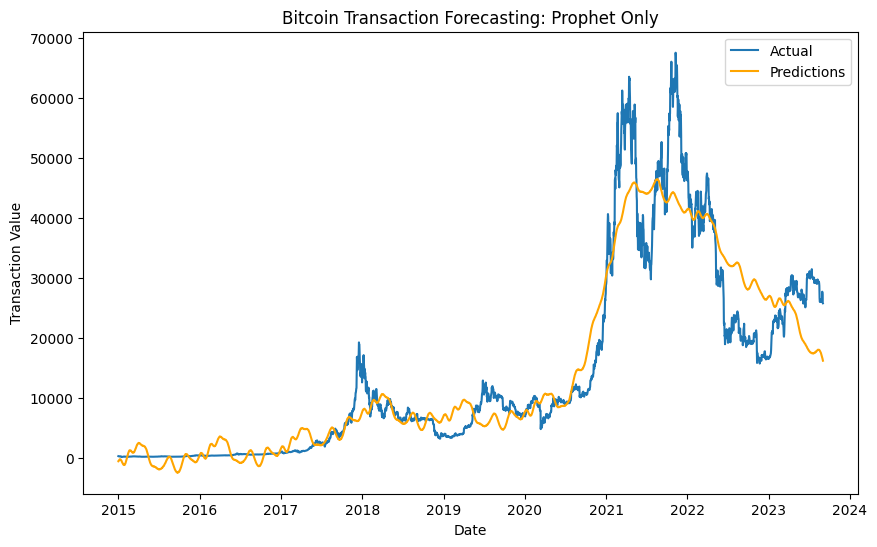

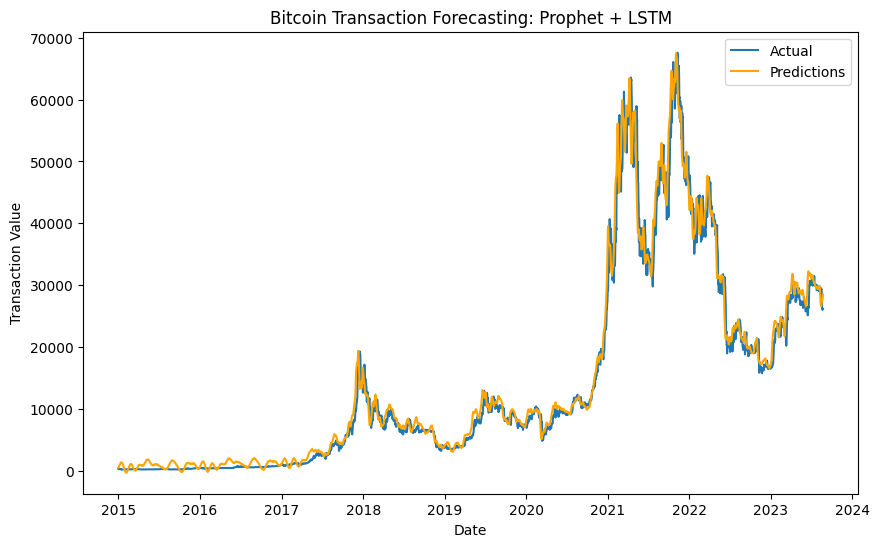

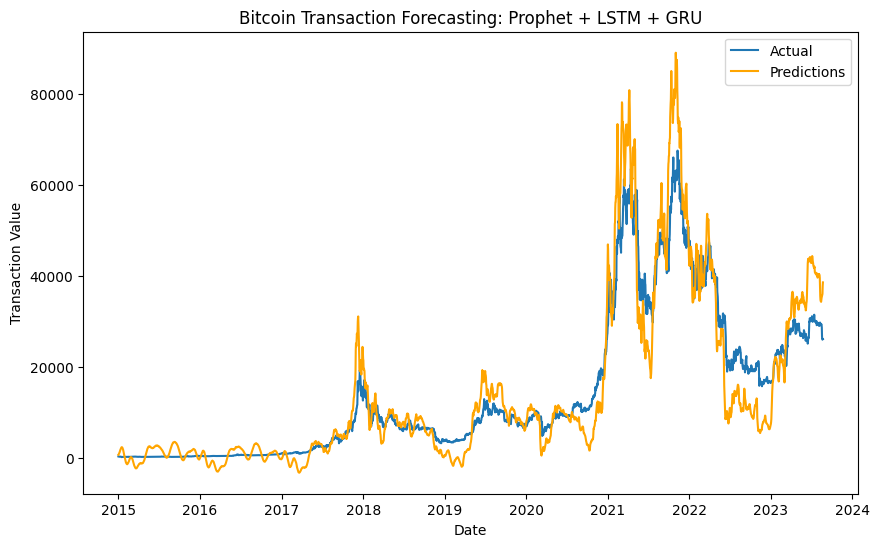

Prophet-only MAE: 3752.7549869830486, MSE: 30643863.456273966, R-squared: 0.8812512026652617
Prophet + LSTM MAE: 1339.885638788094, MSE: 4820350.767149142, R-squared: 0.9813488890121131
Prophet + LSTM + GRU MAE: 4121.503009467766, MSE: 38131994.147305645, R-squared: 0.8524580285987218


In [ ]:
# Combine Prophet, LSTM, and GRU predictions
combined_predictions_lstm_gru = (
    prophet_predictions[:len(gru_predictions_inverse)] +
    lstm_predictions_inverse[:, 0] +
    gru_predictions_inverse[:, 0]
)

# Function for plotting
def plot_predictions(actual, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['ds'][:len(predictions)], actual[:len(predictions)], label='Actual')
    plt.plot(df['ds'][:len(predictions)], predictions, label='Predictions', color='orange')
    plt.legend()
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Transaction Value")
    plt.show()

# Plot predictions
plot_predictions(df['y'], prophet_predictions[:len(df)], "Bitcoin Transaction Forecasting: Prophet Only")
plot_predictions(df['y'], combined_predictions_lstm, "Bitcoin Transaction Forecasting: Prophet + LSTM")
plot_predictions(df['y'], combined_predictions_lstm_gru, "Bitcoin Transaction Forecasting: Prophet + LSTM + GRU")

# Calculate error metrics
def calculate_metrics(actual, predictions):
    mae = mean_absolute_error(actual, predictions)
    mse = mean_squared_error(actual, predictions)
    r2 = r2_score(actual, predictions)
    return mae, mse, r2

# Error metrics for each model
mae_prophet, mse_prophet, r2_prophet = calculate_metrics(df['y'][:len(prophet_predictions)], prophet_predictions[:len(df)])
mae_lstm, mse_lstm, r2_lstm = calculate_metrics(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)
mae_lstm_gru, mse_lstm_gru, r2_lstm_gru = calculate_metrics(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)

print(f"Prophet-only MAE: {mae_prophet}, MSE: {mse_prophet}, R-squared: {r2_prophet}")
print(f"Prophet + LSTM MAE: {mae_lstm}, MSE: {mse_lstm}, R-squared: {r2_lstm}")
print(f"Prophet + LSTM + GRU MAE: {mae_lstm_gru}, MSE: {mse_lstm_gru}, R-squared: {r2_lstm_gru}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/d0milabe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/9i83vphf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16114', 'data', 'file=/tmp/tmp29vixq4x/d0milabe.json', 'init=/tmp/tmp29vixq4x/9i83vphf.json', 'output', 'file=/tmp/tmp29vixq4x/prophet_modelm2ine6hh/prophet_model-20241017102849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:28:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:28:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0412 - val_loss: 0.0048
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0351 - val_loss: 0.0053
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 9.3458e-04 - val_loss: 0.0012
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.0184e-04 - val_loss: 0.0012
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 7.8289e-04 - val_loss: 0.0011
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.0377e-04 - val_loss: 0.0011
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.3047e-04 - val_loss: 0.0010
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.0123e-04 - val_loss: 0.0010
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.2800e-04 - val_loss: 9.5189e-04
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.9237e-04 - val_loss: 9.1484e-04
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.0033e-04 - val_loss: 9.0346e-04
Epoch 12/20
40/40 ━━━━━━━━

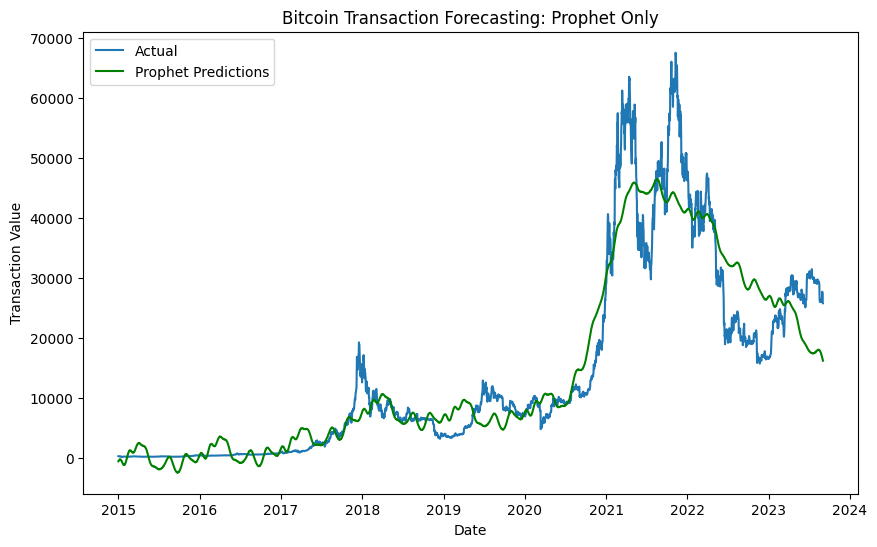

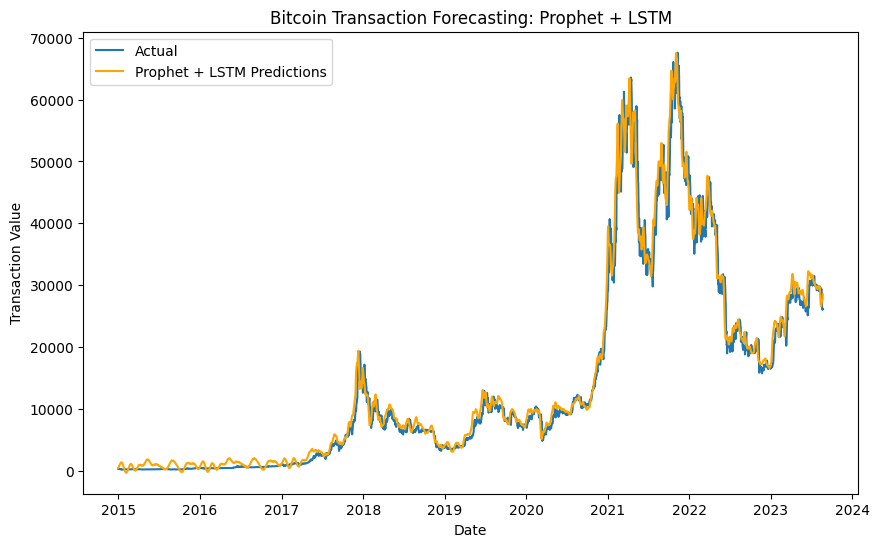

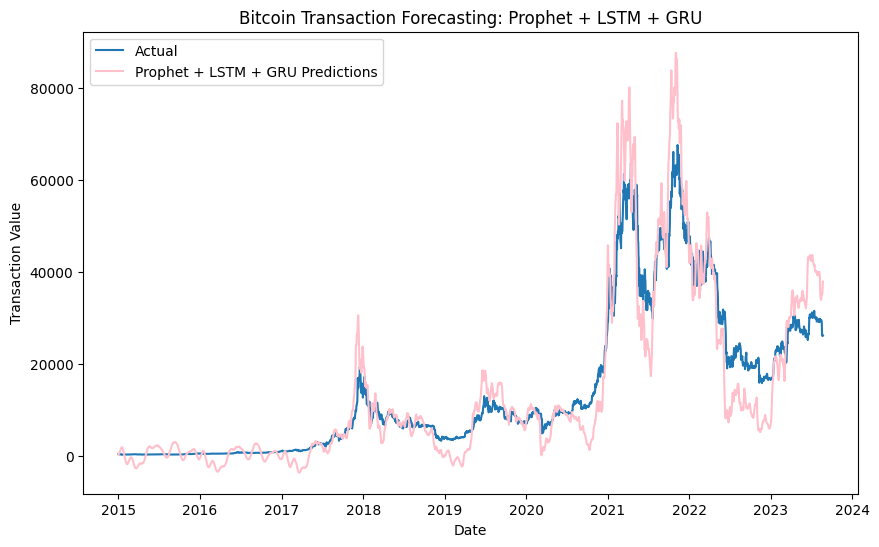

Prophet-only MAE: 3752.7549869830486, MSE: 30643863.456273966, R-squared: 0.8812512026652617
Prophet + LSTM MAE: 1339.885638788094, MSE: 4820350.767149142, R-squared: 0.9813488890121131
Prophet + LSTM + GRU MAE: 4093.4868048395842, MSE: 37243807.39118772, R-squared: 0.8558946394526916


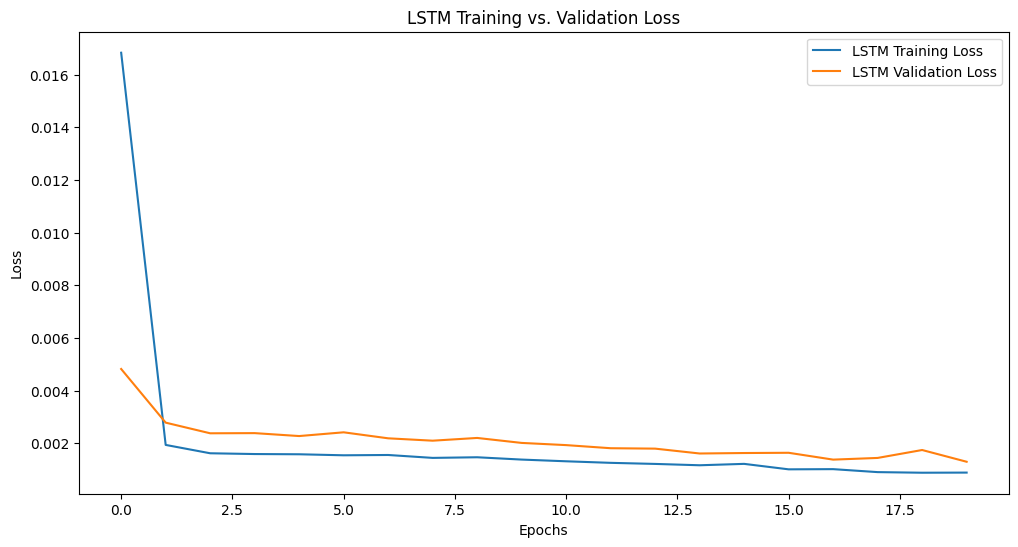

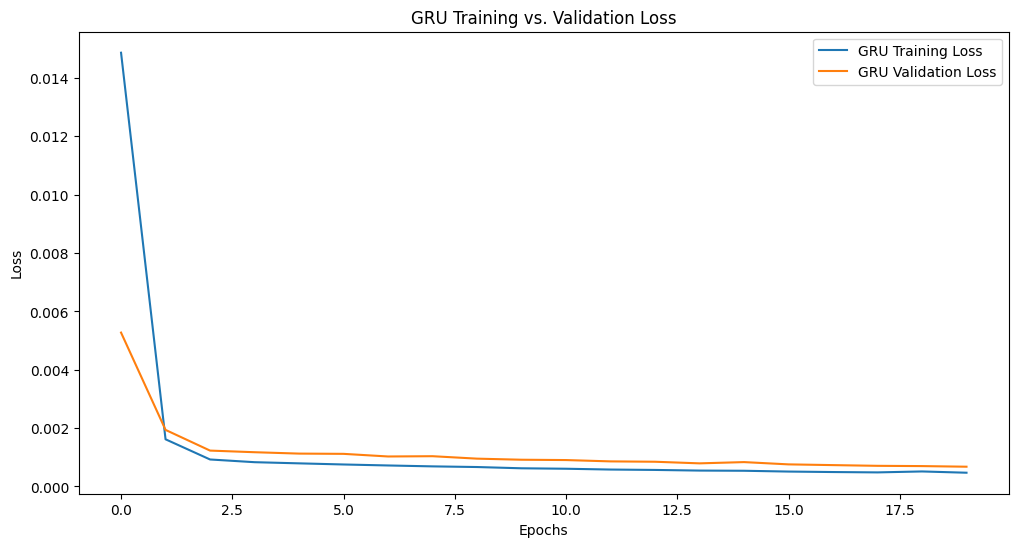

In [ ]:
!pip install prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from prophet import Prophet

# Assuming df is your DataFrame with columns 'ds' (date) and 'y' (transaction value)
# Prepare the data for Prophet
df['ds'] = pd.to_datetime(df['ds'])
df = df.rename(columns={'ds': 'ds', 'y': 'y'})

# Train Prophet model to capture the trend and seasonality
model_prophet = Prophet()
model_prophet.fit(df)

# Make future predictions with Prophet
future = model_prophet.make_future_dataframe(periods=30)  # Forecast 30 days ahead
forecast = model_prophet.predict(future)

# Extract the Prophet predictions and residuals
prophet_predictions = forecast['yhat']
residuals = df['y'] - prophet_predictions[:len(df)]  # Calculate residuals

# Function to prepare data for LSTM/GRU
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# 2. Train LSTM on residuals
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

time_step = 10
X_train, y_train = create_lstm_dataset(residuals_scaled, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Create LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the LSTM model and store training history
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1, validation_split=0.2)

# LSTM predictions on residuals
lstm_predictions = model_lstm.predict(X_train)
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)

# 3. Train GRU on residuals
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(50))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')

# Train the GRU model and store training history
history_gru = model_gru.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1, validation_split=0.2)

# GRU predictions on residuals
gru_predictions = model_gru.predict(X_train)
gru_predictions_inverse = scaler.inverse_transform(gru_predictions)

# Combine Prophet, LSTM, and GRU predictions
combined_predictions_lstm_gru = prophet_predictions[:len(gru_predictions_inverse)] + \
                                 lstm_predictions_inverse[:, 0] + gru_predictions_inverse[:, 0]

# Plot Prophet-only predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(prophet_predictions)], df['y'][:len(prophet_predictions)], label='Actual')
plt.plot(df['ds'][:len(prophet_predictions)], prophet_predictions[:len(df)], label='Prophet Predictions', color='green')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet Only")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# Plot Prophet + LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(combined_predictions_lstm)], df['y'][:len(combined_predictions_lstm)], label='Actual')
plt.plot(df['ds'][:len(combined_predictions_lstm)], combined_predictions_lstm, label='Prophet + LSTM Predictions', color='orange')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet + LSTM")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# Plot Prophet + LSTM + GRU predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(combined_predictions_lstm_gru)], df['y'][:len(combined_predictions_lstm_gru)], label='Actual')
plt.plot(df['ds'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru, label='Prophet + LSTM + GRU Predictions', color='pink')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet + LSTM + GRU")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# 4. Calculate and display error metrics for each model

# Prophet-only metrics
mae_prophet = mean_absolute_error(df['y'][:len(prophet_predictions)], prophet_predictions[:len(df)])
mse_prophet = mean_squared_error(df['y'][:len(prophet_predictions)], prophet_predictions[:len(df)])
r2_prophet = r2_score(df['y'][:len(prophet_predictions)], prophet_predictions[:len(df)])

# Prophet + LSTM metrics
mae_lstm = mean_absolute_error(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)
mse_lstm = mean_squared_error(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)
r2_lstm = r2_score(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)

# Prophet + LSTM + GRU metrics
mae_lstm_gru = mean_absolute_error(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)
mse_lstm_gru = mean_squared_error(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)
r2_lstm_gru = r2_score(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)

print(f"Prophet-only MAE: {mae_prophet}, MSE: {mse_prophet}, R-squared: {r2_prophet}")
print(f"Prophet + LSTM MAE: {mae_lstm}, MSE: {mse_lstm}, R-squared: {r2_lstm}")
print(f"Prophet + LSTM + GRU MAE: {mae_lstm_gru}, MSE: {mse_lstm_gru}, R-squared: {r2_lstm_gru}")

# Plot training and validation loss for LSTM
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation loss for GRU
plt.figure(figsize=(12, 6))
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.title('GRU Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/wfa3_cco.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29vixq4x/9u3b5h48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93414', 'data', 'file=/tmp/tmp29vixq4x/wfa3_cco.json', 'init=/tmp/tmp29vixq4x/9u3b5h48.json', 'output', 'file=/tmp/tmp29vixq4x/prophet_modeloz2ap9li/prophet_model-20241017102958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:29:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:30:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0656 - val_loss: 0.0081
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0331 - val_loss: 0.0051
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.2674e-04 - val_loss: 0.0013
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.7315e-04 - val_loss: 0.0012
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.2410e-04 - val_loss: 0.0011
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 7.9586e-04 - val_loss: 0.0011
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 7.3668e-04 - val_loss: 0.0010
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.1765e-04 - val_loss: 0.0010
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5.7111e-04 - val_loss: 9.6825e-04
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.6167e-04 - val_loss: 9.1208e-04
Epoch 12/100
40/40 ━━━━━

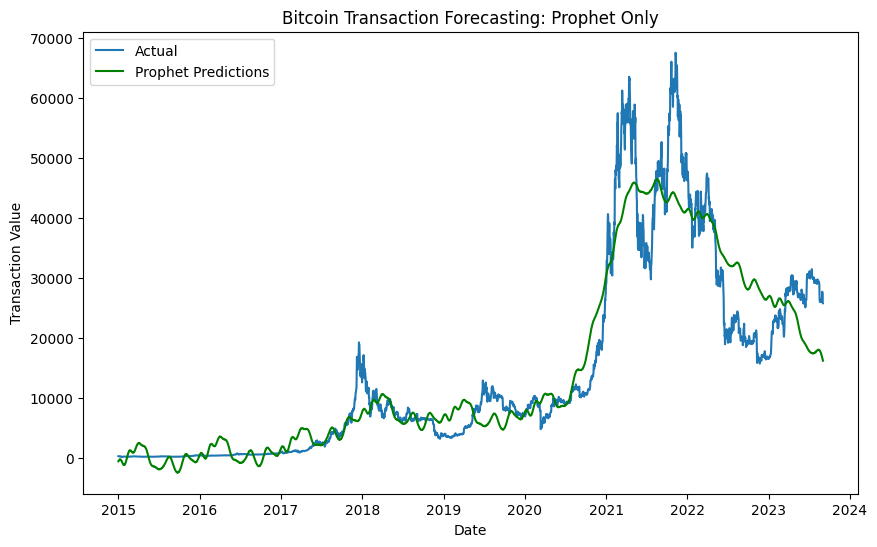

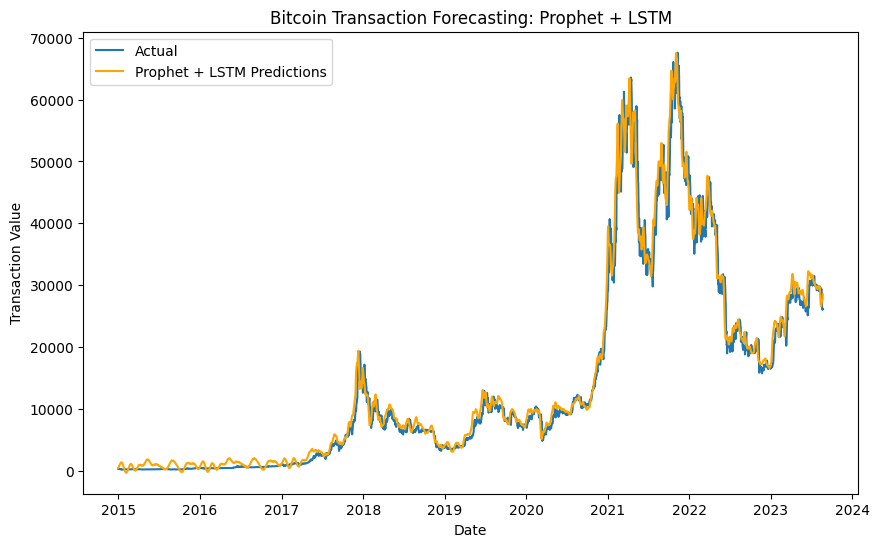

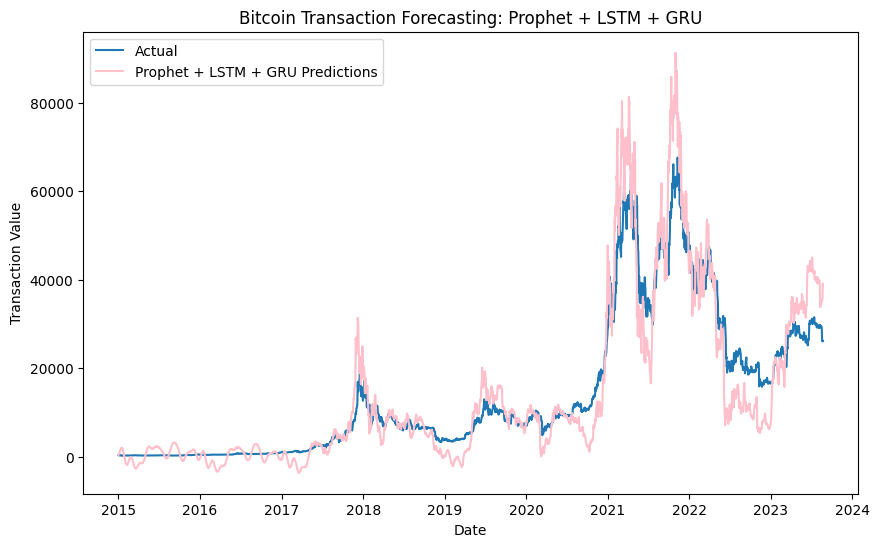

Prophet-only MAE: 3752.7549869830486, MSE: 30643863.456273966, R-squared: 0.8812512026652617
Prophet + LSTM MAE: 1339.885638788094, MSE: 4820350.767149142, R-squared: 0.9813488890121131
Prophet + LSTM + GRU MAE: 4125.393994891633, MSE: 38248726.98190033, R-squared: 0.8520063608344599


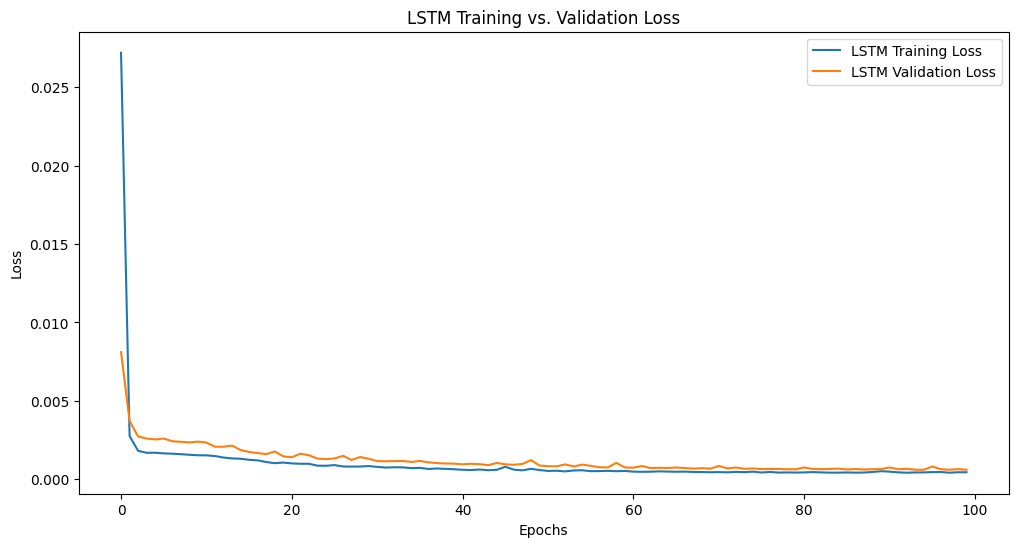

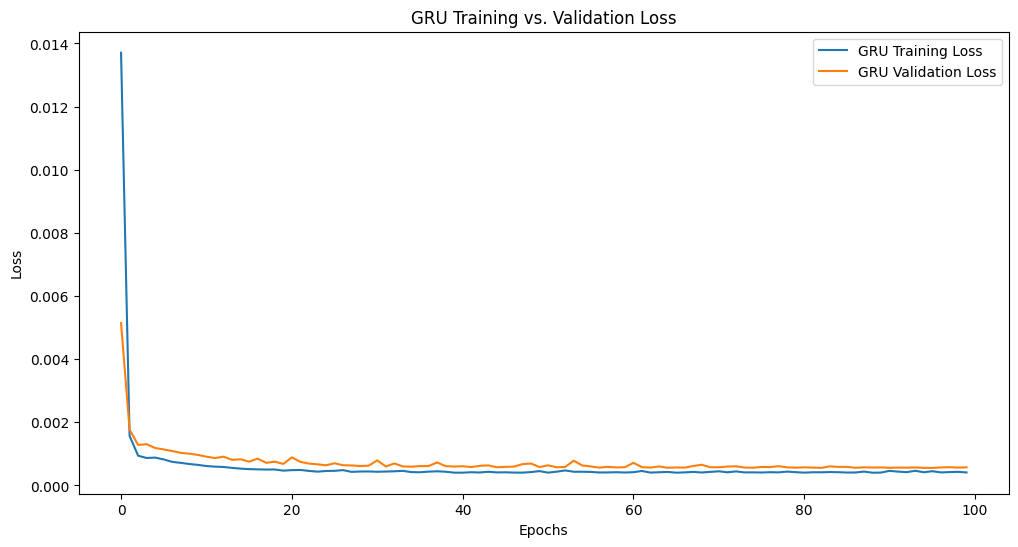

In [ ]:
!pip install prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from prophet import Prophet

# Assuming df is your DataFrame with columns 'ds' (date) and 'y' (transaction value)
# Prepare the data for Prophet
df['ds'] = pd.to_datetime(df['ds'])
df = df.rename(columns={'ds': 'ds', 'y': 'y'})

# Train Prophet model to capture the trend and seasonality
model_prophet = Prophet()
model_prophet.fit(df)

# Make future predictions with Prophet
future = model_prophet.make_future_dataframe(periods=30)  # Forecast 30 days ahead
forecast = model_prophet.predict(future)

# Extract the Prophet predictions and residuals
prophet_predictions = forecast['yhat']
residuals = df['y'] - prophet_predictions[:len(df)]  # Calculate residuals

# Function to prepare data for LSTM/GRU
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# 2. Train LSTM on residuals
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

time_step = 10
X_train, y_train = create_lstm_dataset(residuals_scaled, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Create LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the LSTM model and store training history
history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_split=0.2)

# LSTM predictions on residuals
lstm_predictions = model_lstm.predict(X_train)
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)

# 3. Train GRU on residuals
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(50))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')

# Train the GRU model and store training history
history_gru = model_gru.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_split=0.2)

# GRU predictions on residuals
gru_predictions = model_gru.predict(X_train)
gru_predictions_inverse = scaler.inverse_transform(gru_predictions)

# Combine Prophet, LSTM, and GRU predictions
combined_predictions_lstm_gru = prophet_predictions[:len(gru_predictions_inverse)] + \
                                 lstm_predictions_inverse[:, 0] + gru_predictions_inverse[:, 0]

# Plot Prophet-only predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(prophet_predictions)], df['y'][:len(prophet_predictions)], label='Actual')
plt.plot(df['ds'][:len(prophet_predictions)], prophet_predictions[:len(df)], label='Prophet Predictions', color='green')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet Only")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# Plot Prophet + LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(combined_predictions_lstm)], df['y'][:len(combined_predictions_lstm)], label='Actual')
plt.plot(df['ds'][:len(combined_predictions_lstm)], combined_predictions_lstm, label='Prophet + LSTM Predictions', color='orange')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet + LSTM")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# Plot Prophet + LSTM + GRU predictions
plt.figure(figsize=(10, 6))
plt.plot(df['ds'][:len(combined_predictions_lstm_gru)], df['y'][:len(combined_predictions_lstm_gru)], label='Actual')
plt.plot(df['ds'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru, label='Prophet + LSTM + GRU Predictions', color='pink')
plt.legend()
plt.title("Bitcoin Transaction Forecasting: Prophet + LSTM + GRU")
plt.xlabel("Date")
plt.ylabel("Transaction Value")
plt.show()

# 4. Calculate and display error metrics for each model

# Prophet-only metrics
mae_prophet = mean_absolute_error(df['y'][:len(prophet_predictions)], prophet_predictions[:len(df)])
mse_prophet = mean_squared_error(df['y'][:len(prophet_predictions)], prophet_predictions[:len(df)])
r2_prophet = r2_score(df['y'][:len(prophet_predictions)], prophet_predictions[:len(df)])

# Prophet + LSTM metrics
mae_lstm = mean_absolute_error(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)
mse_lstm = mean_squared_error(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)
r2_lstm = r2_score(df['y'][:len(combined_predictions_lstm)], combined_predictions_lstm)

# Prophet + LSTM + GRU metrics
mae_lstm_gru = mean_absolute_error(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)
mse_lstm_gru = mean_squared_error(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)
r2_lstm_gru = r2_score(df['y'][:len(combined_predictions_lstm_gru)], combined_predictions_lstm_gru)

print(f"Prophet-only MAE: {mae_prophet}, MSE: {mse_prophet}, R-squared: {r2_prophet}")
print(f"Prophet + LSTM MAE: {mae_lstm}, MSE: {mse_lstm}, R-squared: {r2_lstm}")
print(f"Prophet + LSTM + GRU MAE: {mae_lstm_gru}, MSE: {mse_lstm_gru}, R-squared: {r2_lstm_gru}")

# Plot training and validation loss for LSTM
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation loss for GRU
plt.figure(figsize=(12, 6))
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.title('GRU Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
